In [2]:
import glob
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
from natsort import natsorted, ns


In [3]:
# create function
# 2: 1cell for one comparision 
# 3. d2gi/d2go (opls4)
#   d3gi/d3go (opls4) <------------
#   d3gi/d3go (opls3e)  

# d3gi_prm (6 simulations)
# /home/khlee/work/desmond/output/drd3/prm7/drd3_prm7.f*/
# d3gi_pd (6 simulations)
# /home/khlee/work/desmond/output/drd3/pd2/drd3_pd2.f*/
# d3go_prm (6 simulations)
# /home/khlee/work/desmond/output/drd3ao/prm3/drd3ao_prm3.f*/
# d3go_pd (6 simulations)
# /home/khlee/work/desmond/output/drd3ao/pd2/drd3_pd2.f*/


# after 300ns
# (1 row is a plot)
# bro: d2gi/d2go
# prm: d3gi/d3go (opls3e)
# prm: d3gi/d3go (opls4)
# pd: d3gi/d3go (opls3e)
# pd: d3gi/d3go (opls4)



In [8]:
def read_data(receptor, ligand, time_limit=0, Verbose=False):
    data = {"Interface":[], "System":[], "Simulation":[]}
    _filein = glob.glob("/home/khlee/work/desmond/output/"+receptor+"/"+ligand+"/*/")
    _filein = natsorted(_filein, key=lambda y: y.lower())
    if Verbose:
        print(_filein)
    for i in range(len(_filein)):
        t=np.loadtxt(_filein[i]+'/ene/time.dat')
        obs=pickle.load(open(_filein[i]+'/output/gpcr_interface.p',"rb"))
        try:
            assert (len(t)==len(obs))

            temp = pd.DataFrame({"obs":obs, "t":t})
            sel = list(temp[temp["t"]>=time_limit]["obs"])

            data["Interface"] += sel
            data["System"]+=[receptor for a in range(len(sel))]
            data["Simulation"]+=[_filein[i].split("/")[-2].split("_")[-1] for a in range(len(sel))]
        except:
            continue
    
    return pd.DataFrame(data)

In [9]:
d2go_bro = read_data("d2go", "bro", 300)
d2gi_bro = read_data("d2gi", "bro", 300)
d2_bro = pd.concat([d2go_bro,d2gi_bro])
d2_bro_plot = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=d2_bro, kind="bar",
                height=4, aspect=1.2);

AssertionError: 

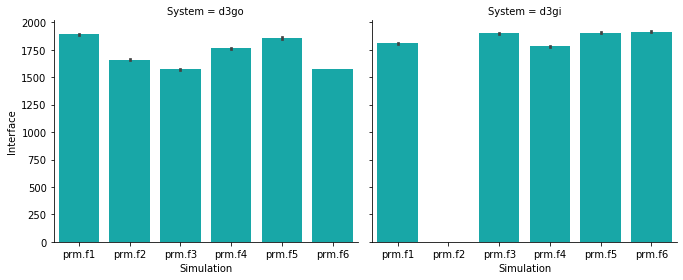

In [15]:
d3go_prm = read_data("d3go", "prm", 300)
d3gi_prm = read_data("d3gi", "prm", 300)
d3_prm = pd.concat([d3go_prm,d3gi_prm])
d3_prm_plot = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=d3_prm, kind="bar",
                height=4, aspect=1.2);

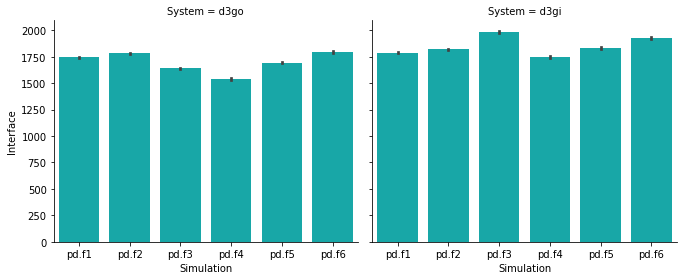

In [16]:
d3go_pd = read_data("d3go", "pd", 300)
d3gi_pd = read_data("d3gi", "pd", 300)
d3_pd = pd.concat([d3go_pd,d3gi_pd])
d3_pd_plot = sns.catplot(x="Simulation", y="Interface",
                col="System", color='c',
                data=d3_pd, kind="bar",
                height=4, aspect=1.2);